# Importing Requried Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint



# Overview of Dataset

In [4]:
filename = r"D:\Python_projects\marketing_campaign.csv"
df = pd.read_csv(filename)

In [5]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [6]:
df.shape # Number of rows and columns

(365, 17)

In [7]:
#Datatypes of columns
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [8]:
# cleaning data ( removing unwanted symbols from the columns and converting them to numerical columns)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))


In [9]:
# cleaning data ( removing unwanted symbols from the columns and converting them to numerical columns)
df['Cost per AdWords Ad'] = df['Cost per AdWords Ad'].apply(lambda x: float(x[1:]))
df['AdWords Click-Through Rate (Clicks / View)'] = df['AdWords Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['AdWords Conversion Rate (Conversions / Click)'] = df['AdWords Conversion Rate (Conversions / Click)'].apply(lambda x: float(x[:-1]))
df['AdWords Cost per Click (Ad Cost / Clicks)'] = df['AdWords Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))


In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"] 

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
360   2019-12-27
361   2019-12-28
362   2019-12-29
363   2019-12-30
364   2019-12-31
Name: Date, Length: 365, dtype: datetime64[ns]

In [11]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan19,4984,59,5,194.0,1.18,8.40,3.30
1,2019-01-02,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan19,4022,71,6,75.0,1.77,7.80,1.05
2,2019-01-03,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan19,3863,44,4,141.0,1.13,9.59,3.23
3,2019-01-04,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62,AW_Jan19,3911,49,5,141.0,1.26,11.08,2.86
4,2019-01-05,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38,AW_Jan19,4070,55,7,133.0,1.36,12.22,2.40


In [12]:
# statistical view
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,87.780822,2.201288,27.153288,2.187808,4717.19726,60.383562,5.980822,134.975342,1.295781,10.184356,2.377863
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,34.000000,0.830000,21.480000,0.610000,3714.00000,31.000000,3.000000,73.000000,0.570000,6.130000,0.850000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,63.000000,1.490000,23.800000,1.410000,4247.00000,49.000000,5.000000,110.000000,1.030000,7.700000,1.760000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,88.000000,2.000000,26.770000,2.020000,4711.00000,60.000000,6.000000,135.000000,1.290000,9.930000,2.290000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,111.000000,2.670000,28.970000,2.760000,5190.00000,73.000000,7.000000,162.000000,1.520000,12.030000,2.810000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,144.000000,5.370000,47.590000,7.140000,5760.00000,89.000000,9.000000,197.000000,2.250000,20.060000,5.650000
std,NaN,618.074639,12.140559,2.924786,28.263014,0.933193,4.165921,1.040820,561.11406,14.368225,1.628106,32.338304,0.338782,2.887445,0.856929


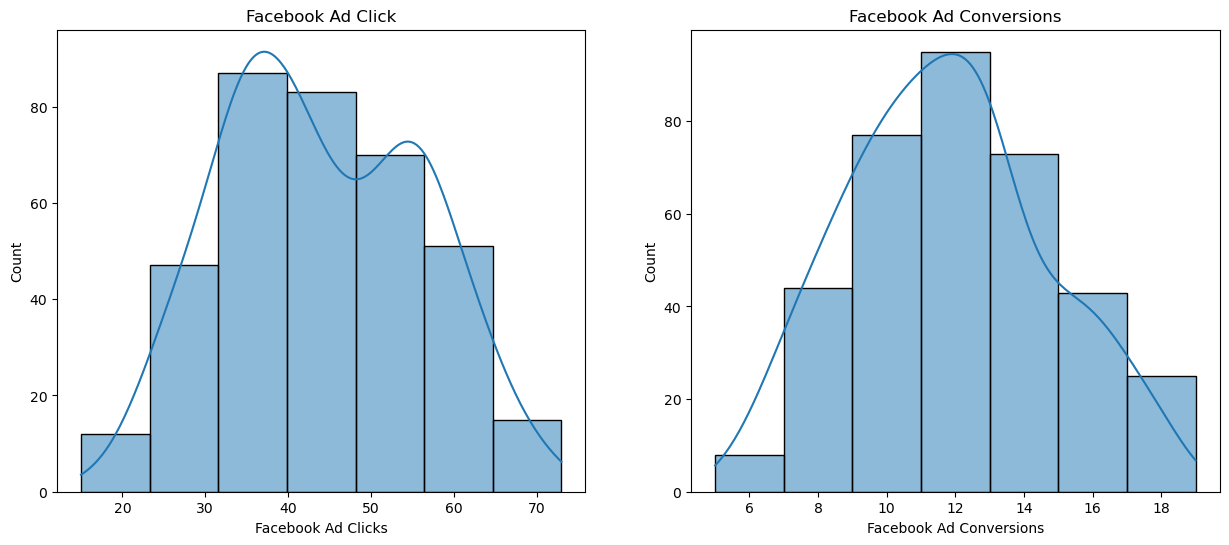

In [13]:
 # distribution of the clicks and conversions - Facebook Ads
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook Ad Click")
sns.histplot(df["Facebook Ad Clicks"],bins = 7,edgecolor ="k", kde = True)

plt.subplot(1,2,2)
plt.title("Facebook Ad Conversions")
sns.histplot(df["Facebook Ad Conversions"],bins = 7,edgecolor ="k", kde = True)
plt.show()


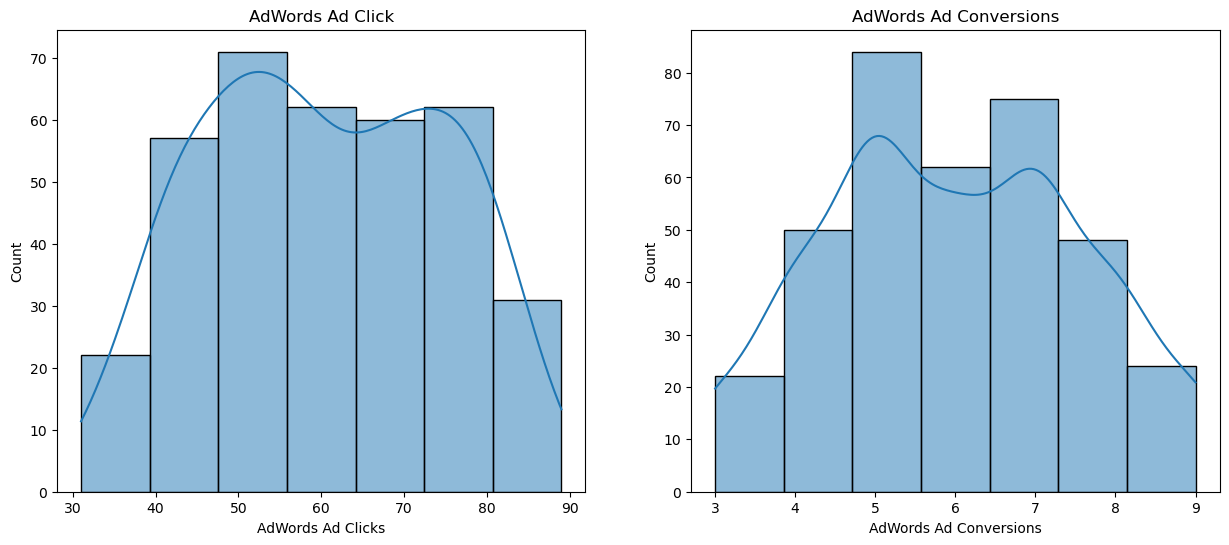

In [14]:
 # distribution of the clicks and conversions - Google Ads
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("AdWords Ad Click")
sns.histplot(df["AdWords Ad Clicks"],bins = 7,edgecolor ="k", kde = True)

plt.subplot(1,2,2)
plt.title("AdWords Ad Conversions")
sns.histplot(df["AdWords Ad Conversions"],bins = 7,edgecolor ="k", kde = True)
plt.show()


# Questions (Note: We have run the campaign for 365 days)

In [16]:
df["Facebook Ad Conversions"]

0       8
1      12
2       8
3       9
4       7
       ..
360    13
361    18
362    13
363     8
364    17
Name: Facebook Ad Conversions, Length: 365, dtype: int64

In [17]:
# creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

# applying function of different campaign's conversions
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')



In [18]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [19]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [20]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns ={'Facebook Conversion Category':'Category'})
facebook

,Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [21]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6 - 10         209
less than 6    156
Name: count, dtype: int64

In [22]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns ={'AdWords Conversion Category':'Category'})
adwords

,Category,count
0,6 - 10,209
1,less than 6,156


In [23]:
category_df = pd.merge(facebook,adwords,on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [24]:
category_df = category_df.iloc[[2,1,0,3]]
category_df

,Category,count_x,count_y
2,less than 6,1,156.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
3,more than 15,47,0.0


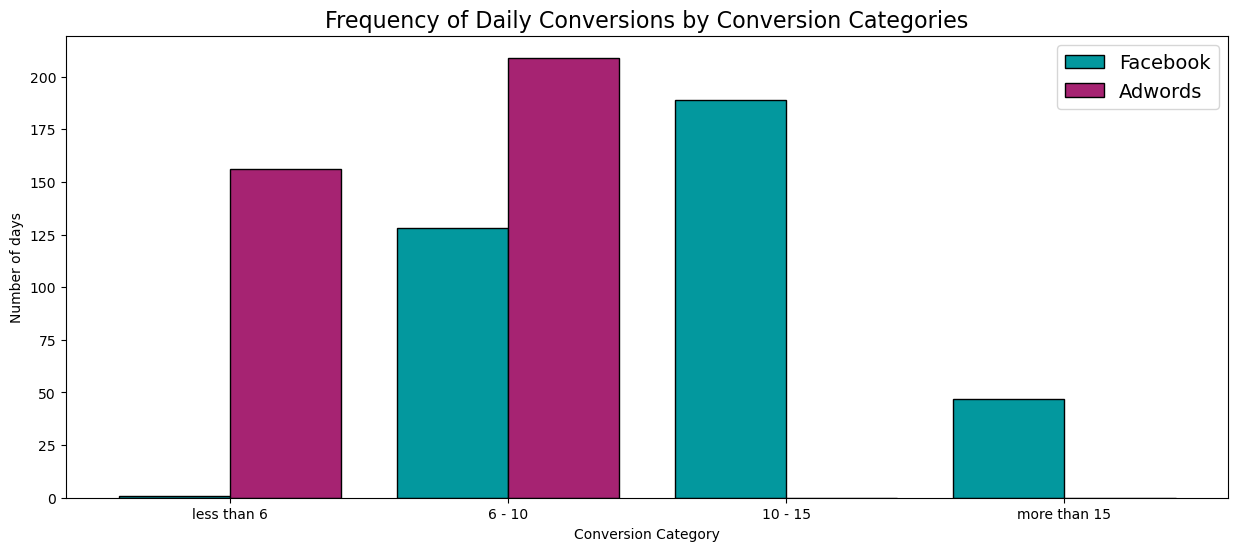

In [25]:
X_axis = np.arange(len(category_df))
plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, category_df['count_x'],0.4,label = 'Facebook',color = '#03989E',linewidth = 1,edgecolor = 'k')
plt.bar(X_axis + 0.2, category_df['count_y'],0.4,label = 'Adwords',color = '#A62372',linewidth = 1,edgecolor = 'k')

plt.xticks(X_axis,category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of days')
plt.title('Frequency of Daily Conversions by Conversion Categories',fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

# Do more clicks on the ad really lead to more sales ?

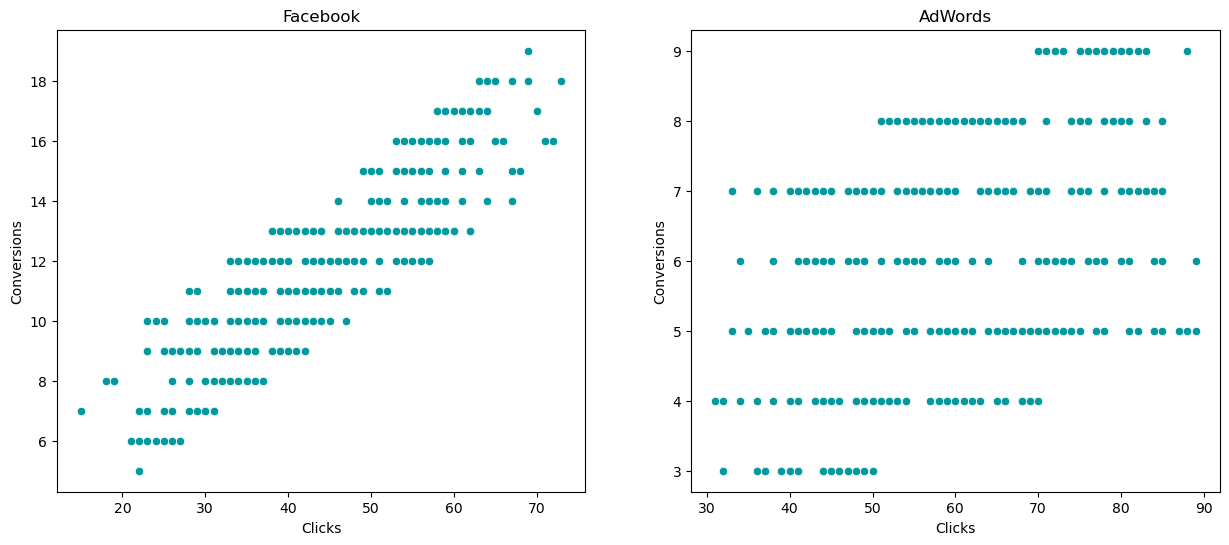

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')


plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'],y = df['AdWords Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [28]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [29]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [30]:
print('Correlation Coeff \n--------------')
print('Facebook :',round(facebook_corr.values[0,1],2))
print('AdWords : ',round(adwords_corr.values[0,1],2))

Correlation Coeff 
--------------
Facebook : 0.87
AdWords :  0.45


# Hypothesis Testing



In [32]:
print('Mean Conversion \n--------------')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic', t_stats, '\np-value',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Mean Conversion 
--------------
Facebook : 11.74
AdWords : 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


# Regression Analysis

# How much Facebook Conversion can be expected from number of facebook ad clicks

In [35]:
X = df[['Facebook Ad Clicks']]                #independent variable
y = df[['Facebook Ad Conversions']]           # depenedent variable

# Model building
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# Model Evaluation
r2 = r2_score(y,prediction) * 100
mse = mean_squared_error(y,prediction)
print('Accuracy(R2 Score):',round(r2,2),'%')
print('Mean Squared Error:',round(mse,2))

Accuracy(R2 Score): 76.35 %
Mean Squared Error: 2.02


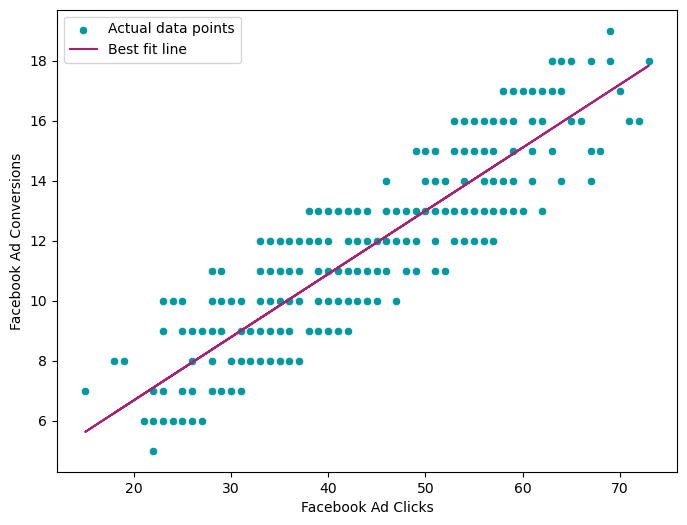

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()

In [37]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
# filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


In [39]:
# extracting month and week day from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

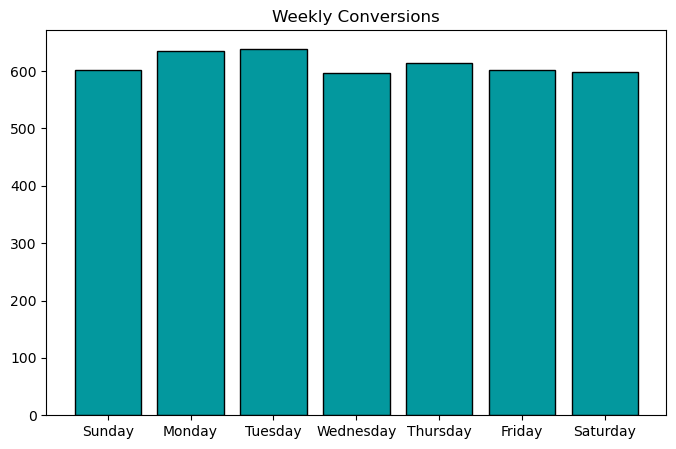

In [40]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#03989E', edgecolor = 'k')
plt.show()

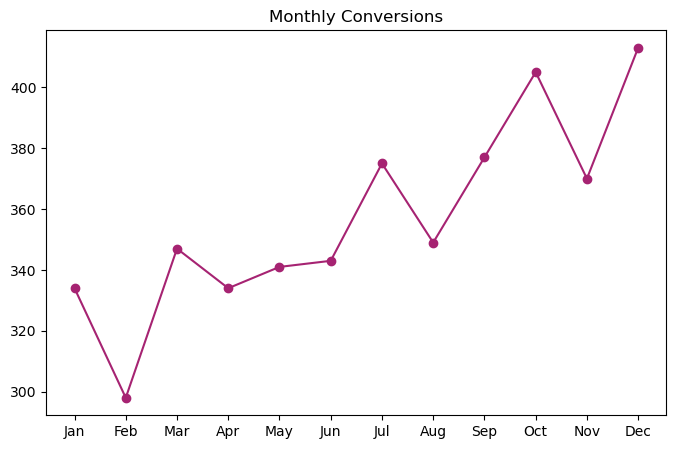

In [41]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'],'-o', color = '#A62372')
plt.show()

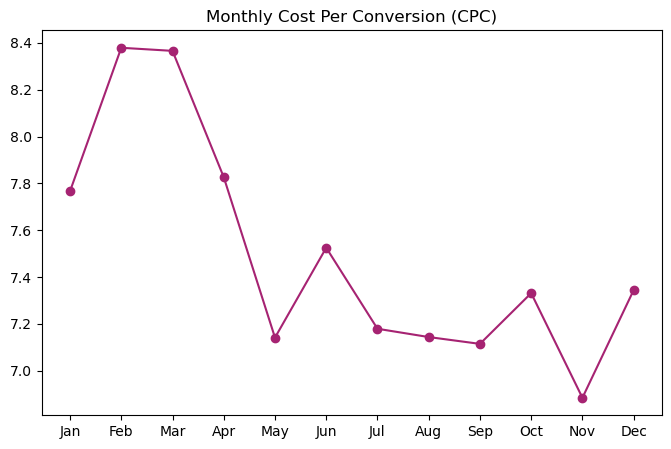

In [42]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#A62372')
plt.show()

In [43]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.755428385103219
P-value: 2.1337375979061323e-26

p-value is less than significance value, Reject the null hypothesis
